## Importing libraries

In [ ]:
import pandas as pd
import numpy as np

## Importing visualization libraries

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [91]:
## reading the advertising data set

In [95]:
adv = pd.read_csv('advertising.csv')

In [96]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [14]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Visualizing data from the data set

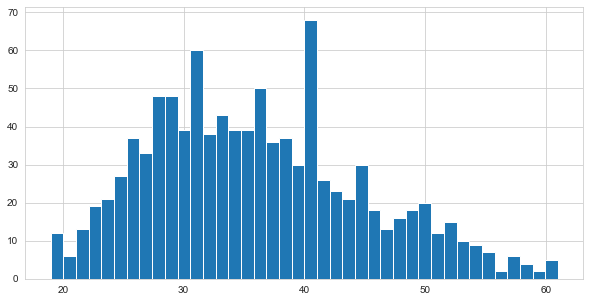

In [97]:
sns.set_style('whitegrid')
adv['Age'].hist(bins=40,figsize=[10,5])

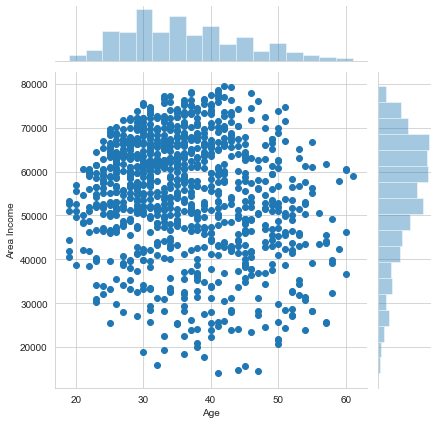

In [32]:
sns.jointplot('Age','Area Income',data=adv)

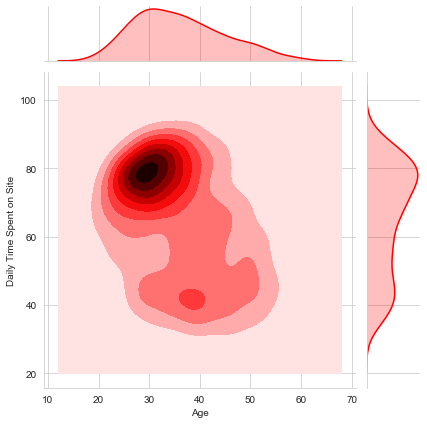

In [39]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=adv,color='red',kind='kde')

C:\Users\mayoor09\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mayoor09\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


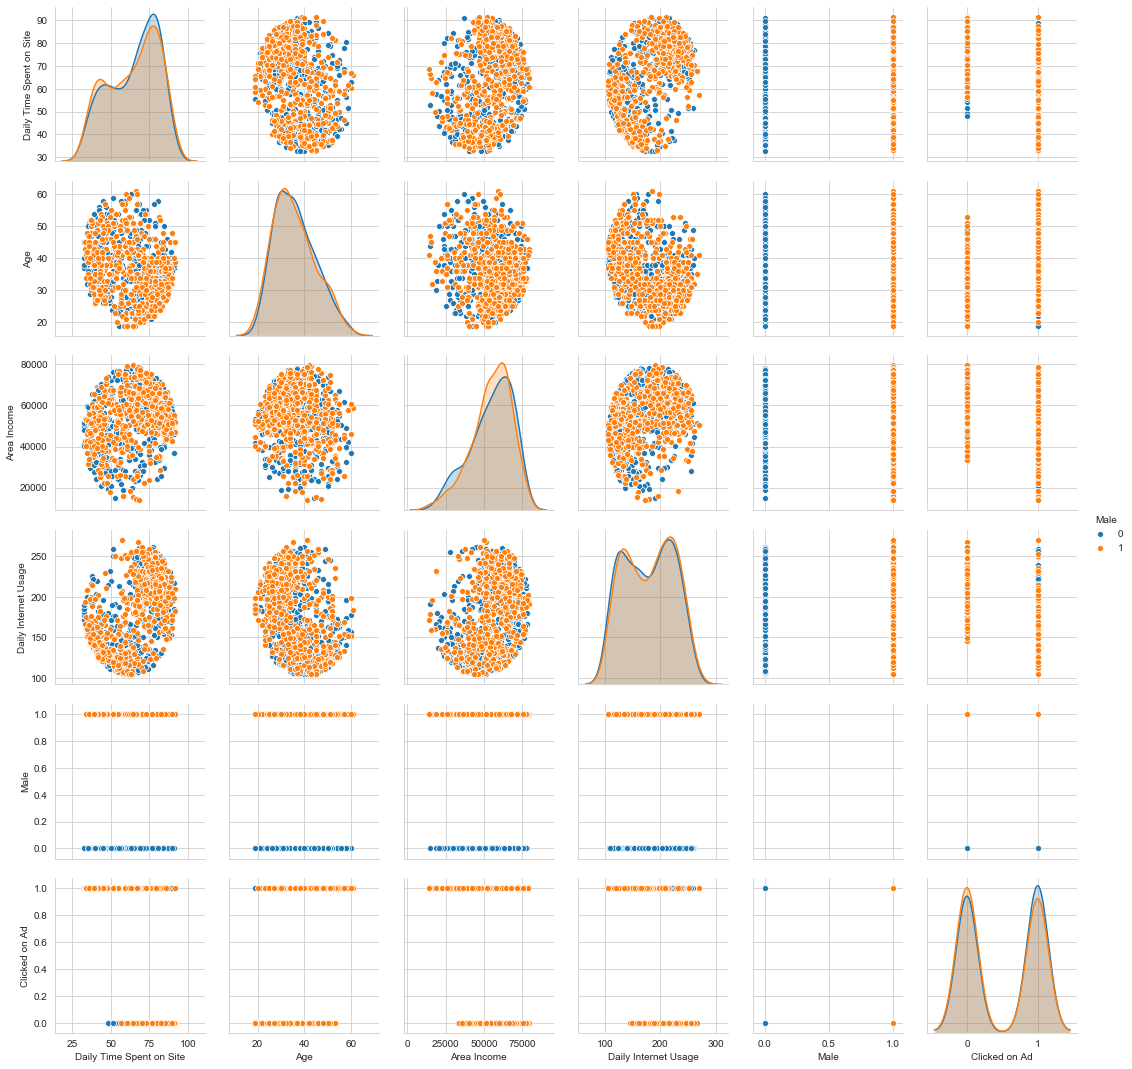

In [35]:
sns.pairplot(adv,hue='Male')

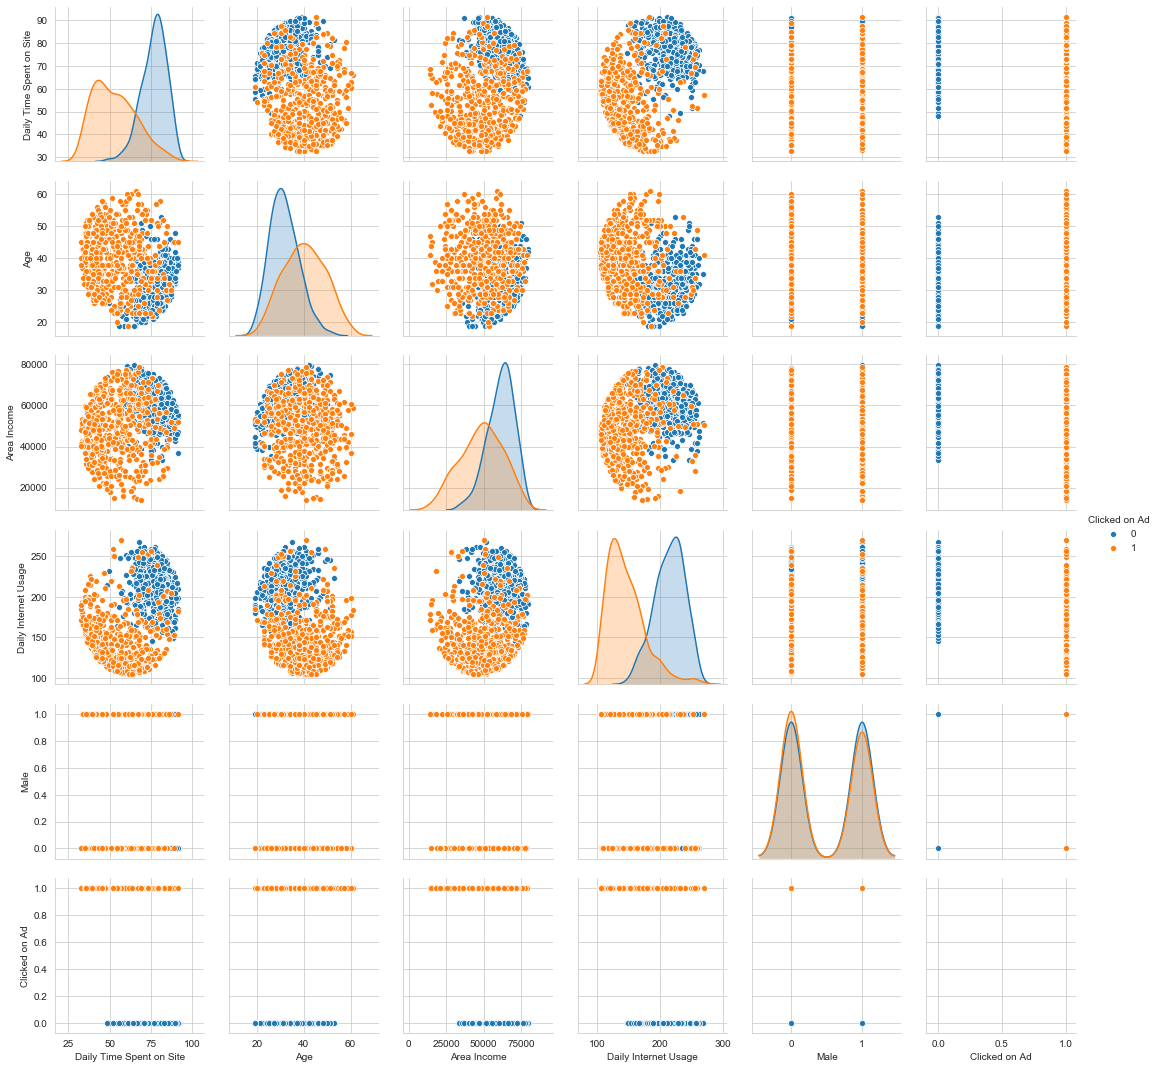

In [44]:
sns.pairplot(adv,hue='Clicked on Ad')

## We have time stamp column. splitting the time stamp to day hour and minute columns 

In [98]:
adv['Timestamp'] = pd.to_datetime(adv['Timestamp'])

In [99]:
adv['Hour'] = adv['Timestamp'].apply(lambda x : x.hour )

In [100]:
adv['Minute'] = adv['Timestamp'].apply(lambda x : x.minute )

In [101]:
adv['DayOfWeek'] = adv['Timestamp'].apply(lambda x : x.dayofweek )

In [102]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Minute,DayOfWeek
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,53,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,35,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,31,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,36,4


## Removing unwanted columns

In [105]:
adv.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Hour', 'Minute', 'DayOfWeek'],
      dtype='object')

In [106]:
adv.drop(['Ad Topic Line', 'City', 'Male', 'Country','Timestamp'],axis=1,inplace=True)

In [107]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Hour,Minute,DayOfWeek
0,68.95,35,61833.90,256.09,0,0,53,6
1,80.23,31,68441.85,193.77,0,1,39,0
2,69.47,26,59785.94,236.50,0,20,35,6
3,74.15,29,54806.18,245.89,0,2,31,6
4,68.37,35,73889.99,225.58,0,3,36,4


## Visualizing the data with new set of columns

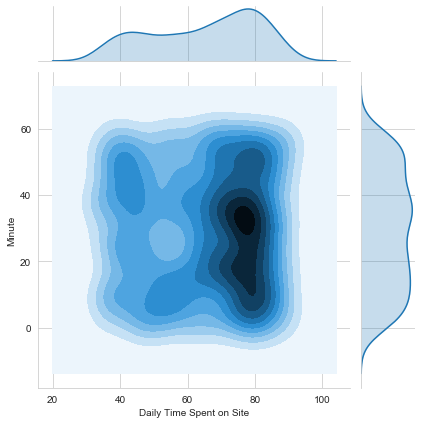

In [109]:
sns.jointplot('Daily Time Spent on Site','Minute',data=adv,kind='kde')

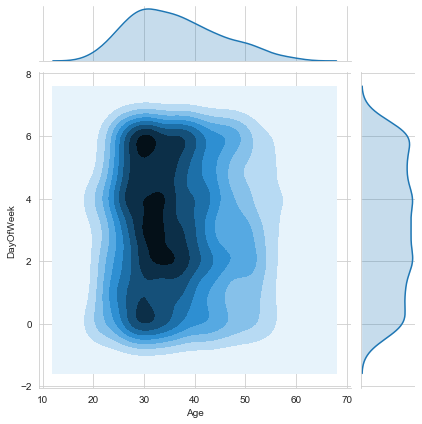

In [81]:
sns.jointplot('Age','DayOfWeek',data=adv,kind='kde')

In [79]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Minute,DayOfWeek
0,68.95,35,61833.90,256.09,0,0,0,53,6
1,80.23,31,68441.85,193.77,1,0,1,39,0
2,69.47,26,59785.94,236.50,0,0,20,35,6
3,74.15,29,54806.18,245.89,1,0,2,31,6
4,68.37,35,73889.99,225.58,0,0,3,36,4


## Splitting the data into train and test datasets

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(adv.drop('Clicked on Ad',axis=1), 
                                                    adv['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lrm = LogisticRegression()

In [115]:
lrm.fit(X_train,y_train)

C:\Users\mayoor09\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
predictions = lrm.predict(X_test)

## Comparing the predictions with the test data set

In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       157
           1       0.93      0.88      0.91       143

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

[[148   9]
 [ 17 126]]


## Here we have achived the precision of 0.90 for ad is not clicked and 0.93 for ad is clicked with this model!!!

## Some more attributes for the logistic regression model

In [126]:
lrm.coef_

array([[-6.06378978e-02,  2.28568073e-01, -1.96084532e-05,
        -3.12522299e-02,  7.79520140e-02,  3.21772958e-02,
         2.16563774e-01]])

In [124]:
lrm.intercept_

array([0.10215282])

In [127]:
X_test.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Hour', 'Minute', 'DayOfWeek'],
      dtype='object')

In [146]:
lrm.coef_

array([[-6.06378978e-02,  2.28568073e-01, -1.96084532e-05,
        -3.12522299e-02,  7.79520140e-02,  3.21772958e-02,
         2.16563774e-01]])

In [138]:
coeffecients = pd.DataFrame(lrm.coef_)


In [143]:
coeffecients = coeffecients.transpose()

In [144]:
coeffecients.columns = ['Coeffecient']


In [150]:
coeffecients['index'] = X_test.columns

In [151]:
coeffecients

,Coeffecient,index
0,-0.060638,Daily Time Spent on Site
1,0.228568,Age
2,-0.000020,Area Income
3,-0.031252,Daily Internet Usage
4,0.077952,Hour
5,0.032177,Minute
6,0.216564,DayOfWeek


## Cheerss!!!